In [ ]:
!pip3 install mxnet

     |████████████████████████████████| 46.9MB 88kB/s 
  Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1


In [ ]:
import matplotlib.pyplot as plt
import mxnet as mx
from mxnet import gluon

In [ ]:
training_data_raw = gluon.data.vision.FashionMNIST(train=True)
test_data_raw = gluon.data.vision.FashionMNIST(train=False)

In [ ]:
batch_size = 128

training_data_aux = gluon.data.DataLoader(
    training_data_raw, batch_size=batch_size, shuffle=True)
test_data_aux = gluon.data.DataLoader(
    test_data_raw, batch_size=batch_size, shuffle=False)

In [ ]:
training_data_size = 0
for X_batch, y_batch in training_data_aux:
    if not training_data_size:
        print("X_batch has shape {}, and y_batch has shape {}"
        .format(X_batch.shape, y_batch.shape))
    training_data_size += X_batch.shape[0]

print("Training Dataset Samples: {}".format(training_data_size))

test_data_size = 0
for X_batch, y_batch in test_data_aux:
    test_data_size += X_batch.shape[0]    
print("Test Dataset Samples: {}".format(test_data_size))

X_batch has shape (128, 28, 28, 1), and y_batch has shape (128,)
Training Dataset Samples: 60000
Test Dataset Samples: 10000


In [ ]:
def transform(data, label):
    data = data.astype('float32')/255
    return data, label

training_data_trans = gluon.data.vision.FashionMNIST(train=True, transform=transform)
test_data_trans = gluon.data.vision.FashionMNIST(train=False, transform=transform)

In [ ]:
training_data = gluon.data.DataLoader(
    training_data_trans, batch_size=128, shuffle=True)
test_data = gluon.data.DataLoader(
    test_data_trans, batch_size=128, shuffle=False)

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA

In [ ]:
import numpy as np
import collections

In [ ]:
number_of_examples = 10000
number_of_features = 784

classes = ["T_shirt/top", "Trouser", "Pullover", "Dress", "Coat",
           "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [ ]:
# For some computations, such as t-SNE, we need full data accessible
X_data = None
y_data = None

for X_batch, y_batch in training_data:
    X_batch = X_batch[:, :, :, 0].reshape(
        X_batch.shape[0], number_of_features).asnumpy()
    y_batch = y_batch.asnumpy()

    if X_data is None:
        X_data = np.copy(X_batch)
        y_data = np.copy(y_batch)
    else:
        X_data = np.concatenate((X_data, X_batch), axis = 0)
        y_data = np.concatenate((y_data, y_batch), axis = 0)

OrderedDict([(0, 6000), (1, 6000), (2, 6000), (3, 6000), (4, 6000), (5, 6000), (6, 6000), (7, 6000), (8, 6000), (9, 6000)])


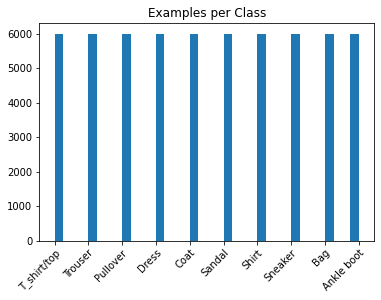

In [ ]:
# Number of examples per class
labels_counter = collections.Counter(y_data)
print(collections.OrderedDict(sorted(labels_counter.items())))

ax = plt.subplot()
ax.hist(y_data, bins="auto")
plt.xticks(range(10))
ax.set_xticklabels(classes, rotation=45, rotation_mode="anchor", ha="right")
plt.title("Examples per Class")
plt.show()

Number of batches seen: 2


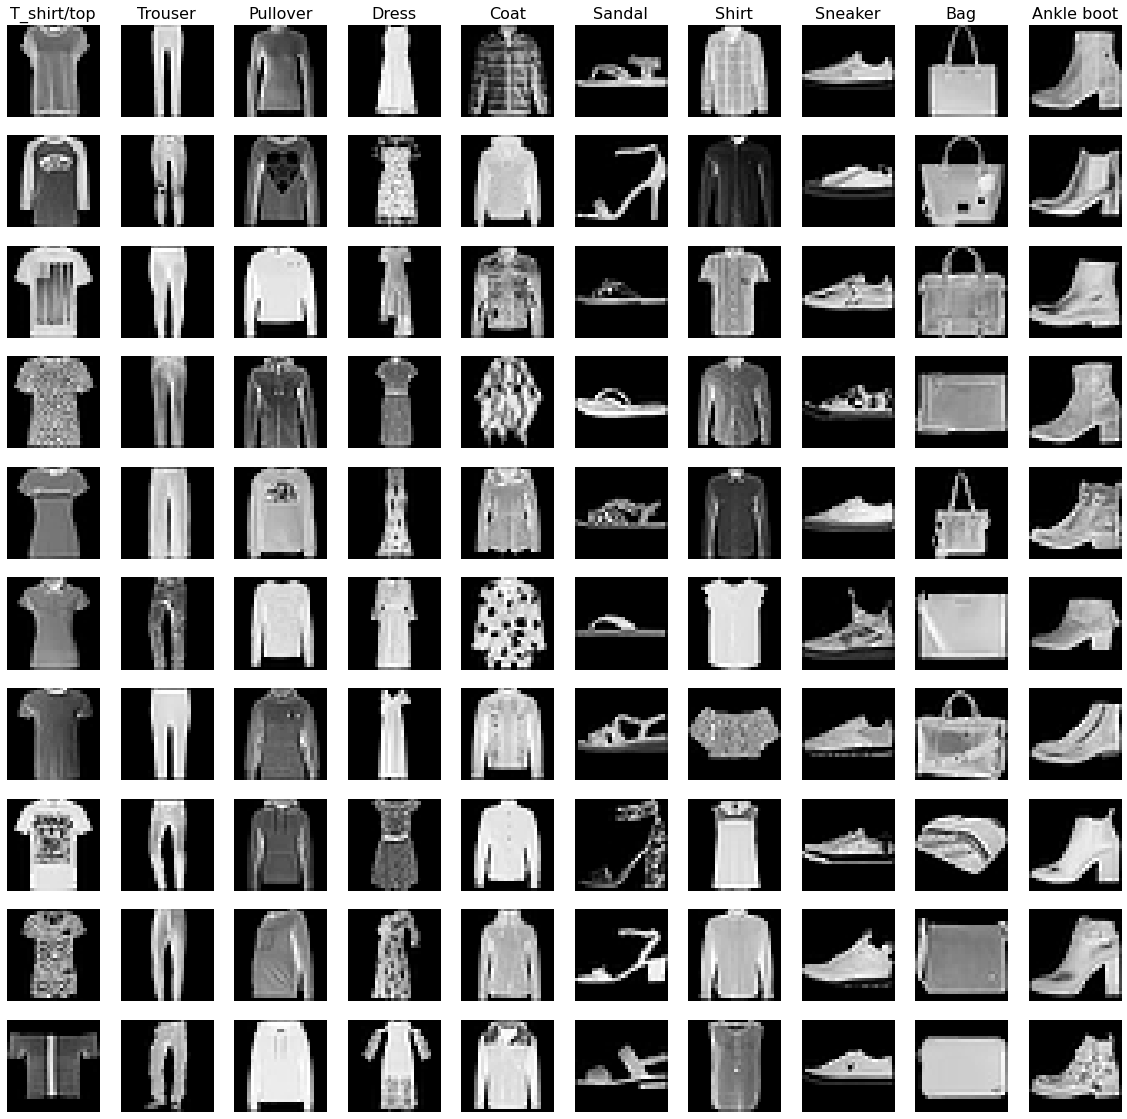

In [ ]:
# Images in Grid Format
fig, axes = plt.subplots(10, 10, figsize=(20, 20))

# Keep track of instances found
instances_per_class = {}
remaining_instances_to_be_found = set(range(10))


# Traverse through the training set to find the 1st 10 instances per class
for iteration, (X_batch, y_batch) in enumerate(training_data):
    for X, y in zip(X_batch, y_batch):
        
        # Properly format inputs
        X = X[:, :, 0].asnumpy()
        y = y.asscalar()
        
        if y not in instances_per_class:
            instances_per_class[y] = 0
            axes[instances_per_class[y], y].set_title(classes[y], fontsize=16)

        if instances_per_class[y] == 10:
            if y in remaining_instances_to_be_found:
                remaining_instances_to_be_found.remove(y)
            continue

        axes[instances_per_class[y], y].imshow(X, cmap="gray")
        axes[instances_per_class[y], y].axis('off')

        instances_per_class[y] += 1

    if not remaining_instances_to_be_found:
        # We are done
        break

print("Number of batches seen:", iteration + 1)

In [ ]:
# PCA Calculation (3 components)
pca = PCA(n_components=3)

pca_df = pd.DataFrame(columns=["x", "y", "z", "class"])

pca_result = pca.fit_transform(X_data)

new_df = pd.DataFrame({
    "x": pca_result[:, 0],
    "y": pca_result[:, 1],
    "z": pca_result[:, 2],
    "class": y_data
    })

pca_df = pca_df.append(new_df, ignore_index=True)

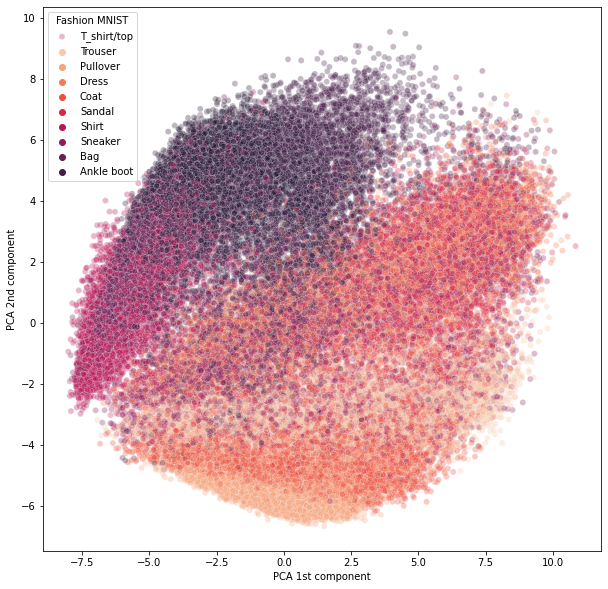

In [ ]:
# PCA 2D Plot
plt.figure(figsize=(10, 10))

sns.scatterplot(
    data = pca_df,
    x = "x",
    y = "y",
    hue = "class",
    palette = sns.color_palette("rocket_r", 10),
    legend = "full",
    alpha = 0.3
)

# Modify Legend and Labels
plt.legend(classes, title = "Fashion MNIST", loc="upper left")
plt.xlabel("PCA 1st component")
plt.ylabel("PCA 2nd component")

plt.show()

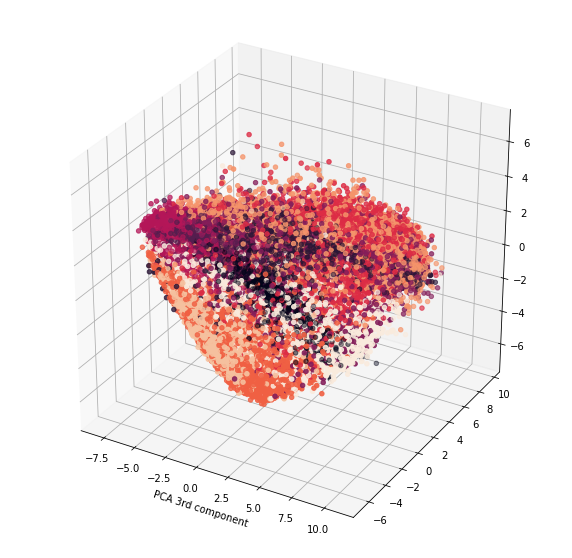

In [ ]:
# PCA 3D Plot
ax = plt.figure(figsize=(10, 10)).gca(projection='3d')
colormap = sns.color_palette("rocket_r", 10, as_cmap=True)

ax.scatter(
    xs=pca_df["x"],
    ys=pca_df["y"],
    zs=pca_df["z"],
    c=pca_df["class"], 
    cmap=colormap
)

# Modify Legend and Labels
ax.set_xlabel("PCA 1st component")
ax.set_xlabel("PCA 2nd component")
ax.set_xlabel("PCA 3rd component")

plt.show()

In [ ]:
from sklearn.manifold import TSNE

In [ ]:
pca = PCA(n_components=50)
pca_result = pca.fit_transform(X_data[:number_of_examples])

tsne = TSNE(n_components=3)
tsne_df = pd.DataFrame(columns=["x", "y", "z", "class"])

tsne_result = tsne.fit_transform(pca_result)

new_df = pd.DataFrame({
    "x": tsne_result[:, 0],
    "y": tsne_result[:, 1],
    "z": tsne_result[:, 2],
    "class": y_data[:number_of_examples]
    })
tsne_df = tsne_df.append(new_df, ignore_index=True)

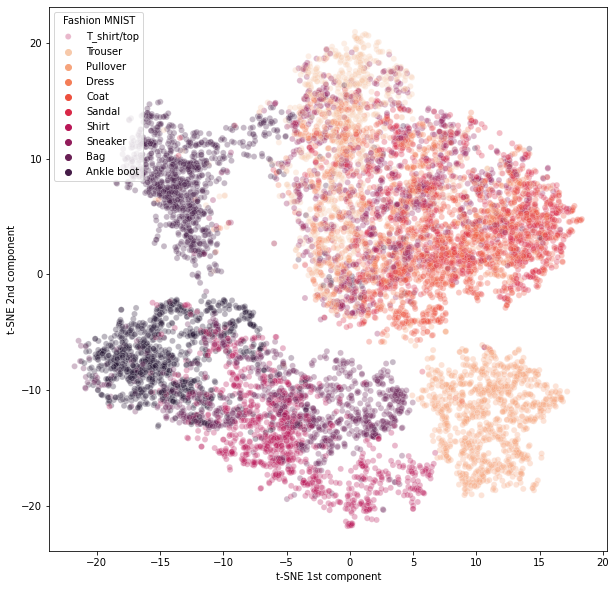

In [ ]:
# t-SNE Plot
plt.figure(figsize=(10, 10))

sns.scatterplot(
    data = tsne_df,
    x = "x",
    y = "y",
    hue = "class",
    palette = sns.color_palette("rocket_r", 10),
    legend = "full",
    alpha = 0.3
)

# Modify Legend and Labels
plt.legend(classes, title = "Fashion MNIST", loc="upper left")
plt.xlabel("t-SNE 1st component")
plt.ylabel("t-SNE 2nd component")

plt.show()

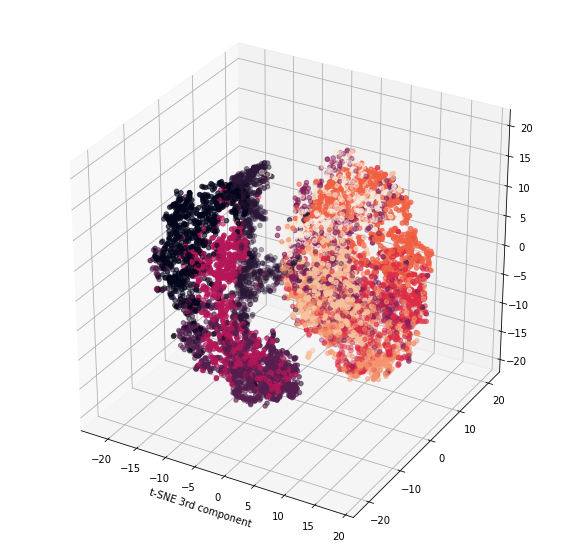

In [ ]:
# t-SNE 3D Plot
ax = plt.figure(figsize=(10, 10)).gca(projection='3d')
colormap = sns.color_palette("rocket_r", 10, as_cmap=True)

ax.scatter(
    xs=tsne_df["x"],
    ys=tsne_df["y"],
    zs=tsne_df["z"],
    c=tsne_df["class"], 
    cmap=colormap
)

# Modify Legend and Labels
ax.set_xlabel("t-SNE 1st component")
ax.set_xlabel("t-SNE 2nd component")
ax.set_xlabel("t-SNE 3rd component")

plt.show()

In [ ]:
!pip3 install umap-learn

     |████████████████████████████████| 81kB 3.8MB/s 
     |████████████████████████████████| 1.2MB 9.9MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.1-cp37-none-any.whl size=76569 sha256=b18cd37731b3677edff16f6fd1b7016384a8427666e9a2444497ab0a097f4720
  Stored in directory: /root/.cache/pip/wheels/ad/df/d5/a3691296ff779f25cd1cf415a3af954b987fb53111e3392cf4
  Created wheel for pynndescent: filename=pynndescent-0.5.2-cp37-none-any.whl size=51351 sha256=9a833c9baa7ece7a25348bd39864ec3cceeeb2de087bd5e69163ef25b4522ed2
  Stored in directory: /root/.cache/pip/wheels/ba/52/4e/4c28d04d144a28f89e2575fb63628df6e6d49b56c5ddd0c74e
Successfully built umap-learn pynndescent


In [ ]:
import umap

In [ ]:
embedding = umap.UMAP(n_neighbors=5).fit_transform(X_data)

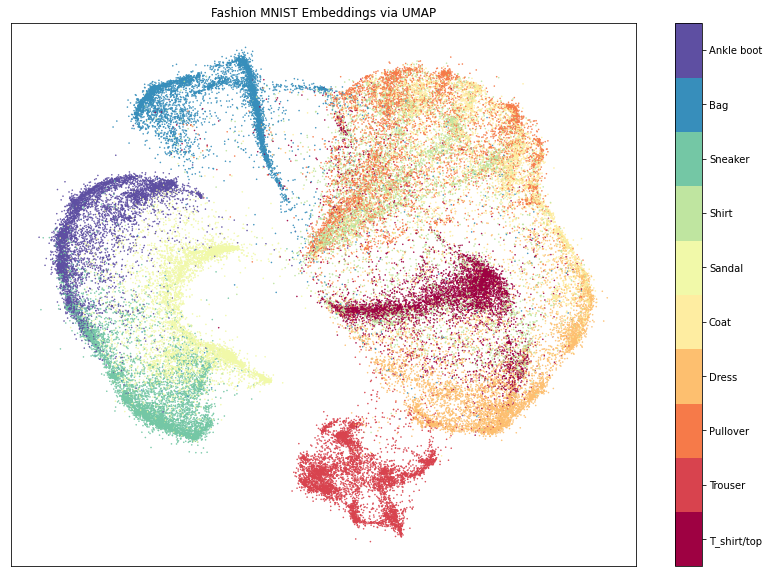

In [ ]:
fig, ax = plt.subplots(1, figsize=(14, 10))
plt.scatter(*embedding.T, s=0.3, c=y_data, cmap='Spectral', alpha=1.0)
plt.setp(ax, xticks=[], yticks=[])
cbar = plt.colorbar(boundaries=np.arange(11)-0.5)
cbar.set_ticks(np.arange(10))
cbar.set_ticklabels(classes)
plt.title('Fashion MNIST Embeddings via UMAP');

In [ ]:
!pip3 install pymde

     |████████████████████████████████| 143kB 4.2MB/s 
     |████████████████████████████████| 1.2MB 7.0MB/s 
  Created wheel for pynndescent: filename=pynndescent-0.5.2-cp37-none-any.whl size=51351 sha256=5125ddde8b1da88ec6f6874b553421b22398d5cb7970514da77c6cbecc8fa375
  Stored in directory: /root/.cache/pip/wheels/ba/52/4e/4c28d04d144a28f89e2575fb63628df6e6d49b56c5ddd0c74e
Successfully built pynndescent


In [ ]:
import pymde

In [ ]:
embedding = pymde.preserve_neighbors(X_data, constraint=pymde.Standardized()).embed(verbose=True)

May 10 07:45:46 AM: Your dataset appears to contain duplicated items (rows); when embedding, you should typically have unique items.
May 10 07:45:46 AM: The following items have duplicates [ 1417  3136  3213  5206  5468  5486  8413 10490 10987 12412 12484 13794
 13873 15508 15772 15897 16114 16635 18047 18906 20302 20387 20737 22258
 23647 24308 24480 30661 30824 30924 32430 33087 35006 38971 39329 39643
 41184 42578 42792 45792 46418 47166 48587 49245 51398 57172 57179 57890
 59768]
May 10 07:46:11 AM: Fitting a standardized embedding into R^2, for a graph with 60000 items and 1091190 edges.
May 10 07:46:11 AM: `embed` method parameters: eps=1.0e-05, max_iter=300, memory_size=10
May 10 07:46:12 AM: iteration 000 | distortion 0.214231 | residual norm 0.0217253 | step length 0.583498 | percent change 0.00365945
May 10 07:46:20 AM: iteration 030 | distortion 0.135585 | residual norm 0.000289754 | step length 1 | percent change 1.18481
May 10 07:46:28 AM: iteration 060 | distortion 0.1326

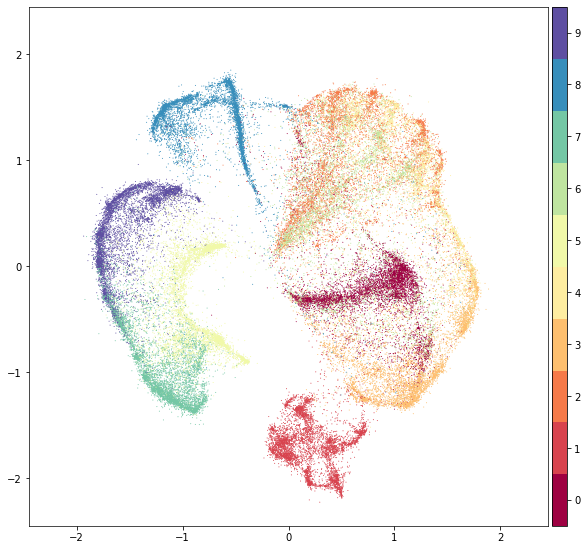

In [ ]:
pymde.plot(embedding, color_by=y_data)

In [ ]:
embedding = pymde.preserve_neighbors(X_data, verbose=True).embed()

May 10 07:43:16 PM: Computing 15-nearest neighbors, with max_distance=None
Mon May 10 19:43:33 2021 Building RP forest with 21 trees
Mon May 10 19:43:42 2021 NN descent for 16 iterations
	 1  /  16
	 2  /  16
	 3  /  16
	Stopping threshold met -- exiting after 3 iterations
May 10 07:44:05 PM: Your dataset appears to contain duplicated items (rows); when embedding, you should typically have unique items.
May 10 07:44:05 PM: The following items have duplicates [ 1372  2838  3706  4317  5734  6240  6726  8440  9612 12040 13791 15203
 22400 22581 24589 26711 27208 29507 29860 31013 32675 36126 37469 39714
 40018 40266 41320 42125 42999 45092 45487 45551 45987 47502 49583 53912
 54369 56948 57362 58006 58069 58862 59859]
May 10 07:44:05 PM: Computing quadratic initialization.


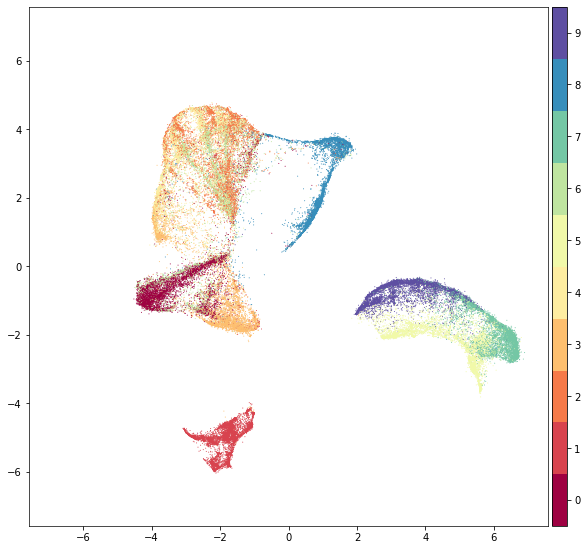

In [ ]:
pymde.plot(embedding, color_by=y_data)